### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

#### Importing DataSet and get output:

In [2]:
df = pd.read_csv(r"E:\Anu\datatrained\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Preporcessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The below graph shows us the Attrition rate of all the employess:

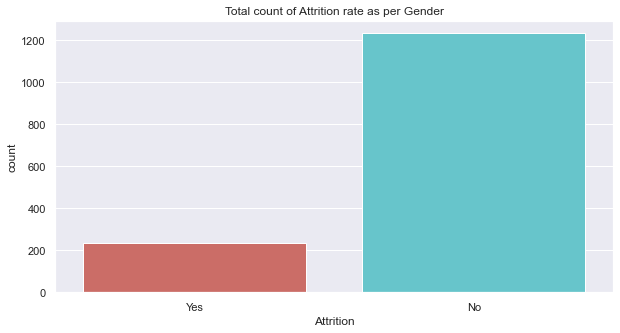

In [7]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Attrition", data=df, palette="hls").set(title='Total count of Attrition rate as per Gender')

It appears that Female employees are less compared to Male employees:

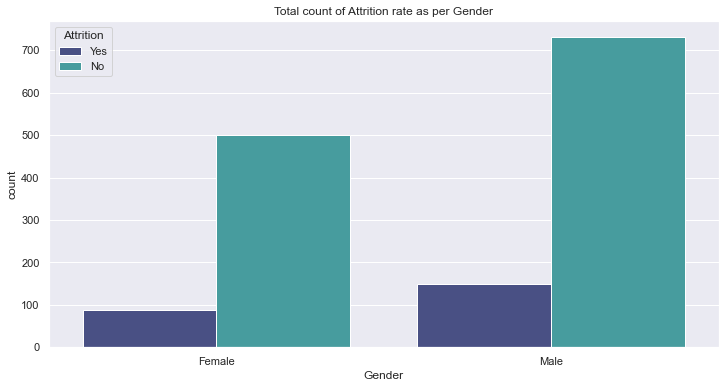

In [10]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Attrition",data=df, palette="mako").set(title='Total count of Attrition rate as per Gender')

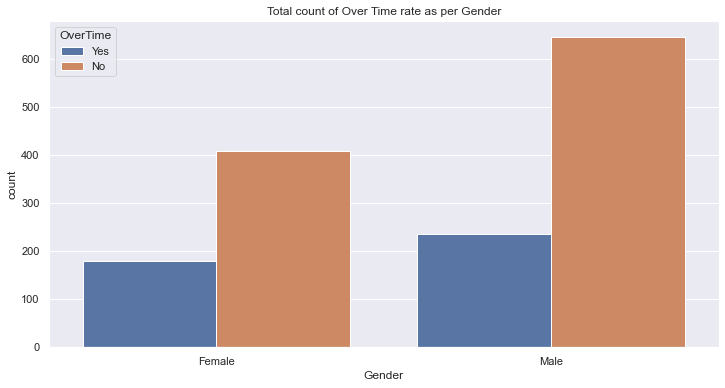

In [11]:
# OT count :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="OverTime", data=df).set(title='Total count of Over Time rate as per Gender')

[Text(0.5, 1.0, 'Employee age vs years ata company')]

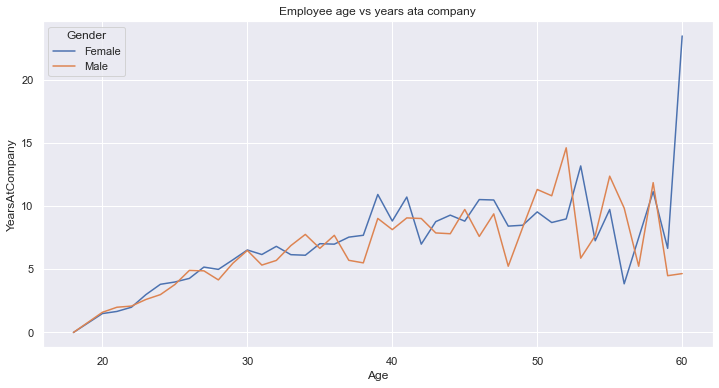

In [12]:
# Relation between Age of company and employee working age :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x="Age", y="YearsAtCompany", hue="Gender", ci=None).set(title='Employee age vs years ata company')

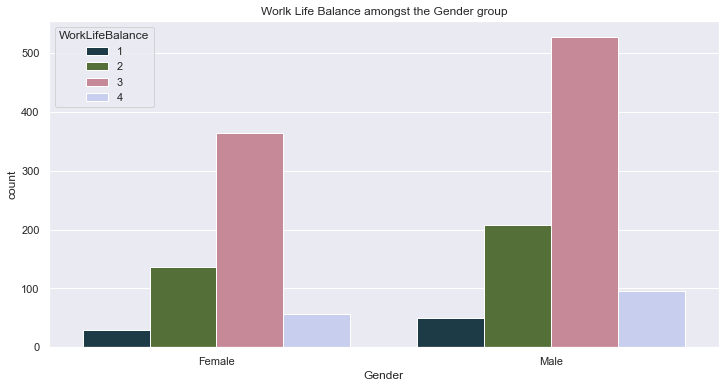

In [13]:
# Compare worklife balance of employee:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="WorkLifeBalance", data=df, palette="cubehelix").set(title='Worlk Life Balance amongst the Gender group')

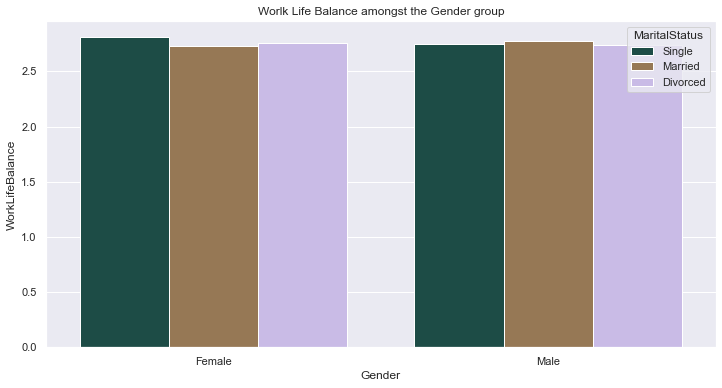

In [14]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(y="WorkLifeBalance",x="Gender",hue="MaritalStatus", data=df, palette="cubehelix", orient="v", ci=None).set(title='Worlk Life Balance amongst the Gender group')

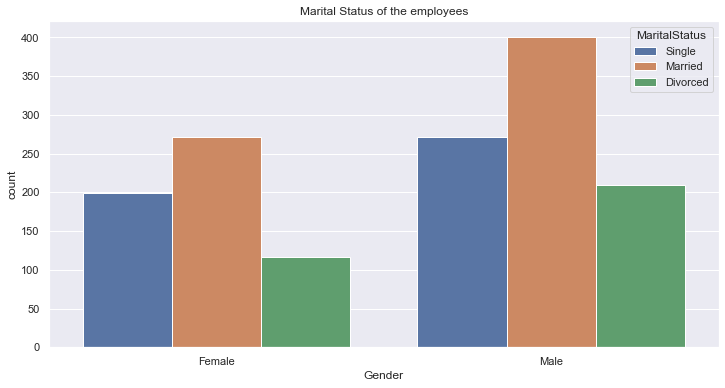

In [15]:
# Marital Status :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="MaritalStatus", data=df).set(title='Marital Status of the employees')

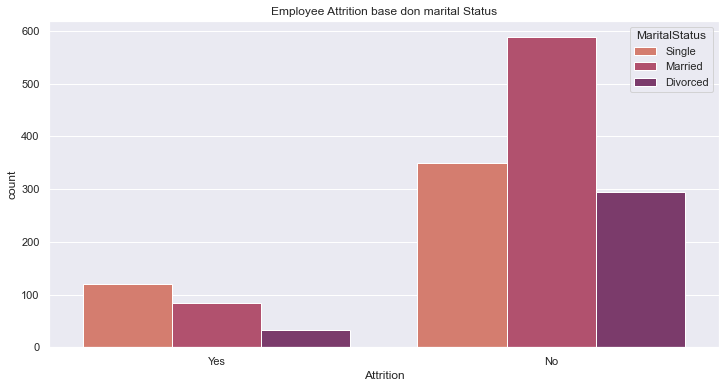

In [17]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Attrition", hue="MaritalStatus", data=df, palette="flare").set(title='Employee Attrition base don marital Status')

In [18]:
#Function For Plotting Distribution of Numerical Variable and its affect on attirition

def NV_TP(df,segment,target="Attrition"):
    
    fig,ax=plt.subplots(ncols=2,figsize=(14,7))
    sns.boxplot(x = target, y = segment, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment + " vs " + target)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment], ax=ax[1], kde=False)
    
    plt.show()

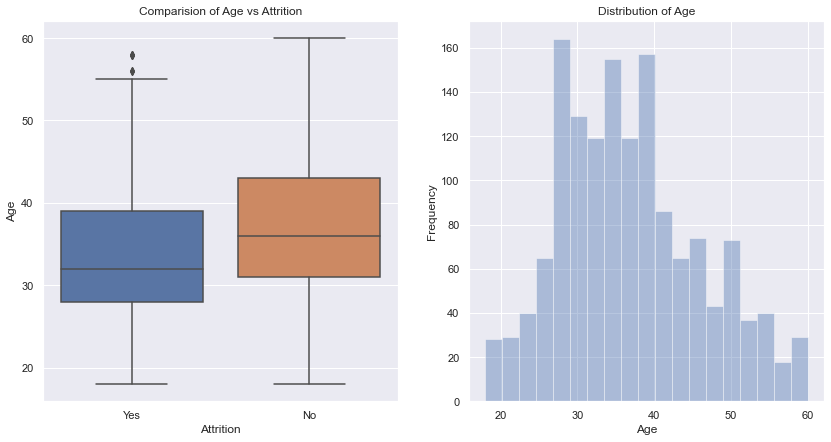

In [19]:
#Checking Distribution of Age and it's related to attirition or not
NV_TP(df,segment="Age")

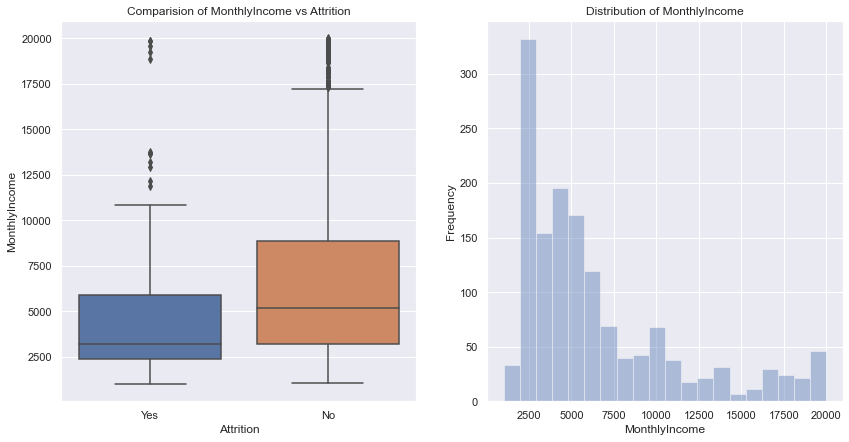

In [20]:
NV_TP(df,segment="MonthlyIncome")

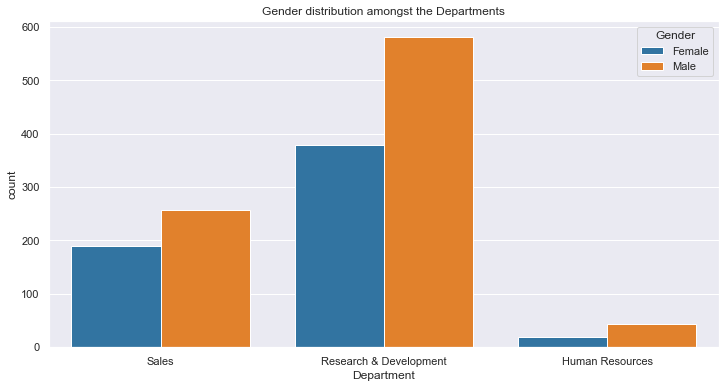

In [21]:
# Departments distribution of Employee:

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", hue="Gender", data=df, palette="tab10").set(title='Gender distribution amongst the Departments')

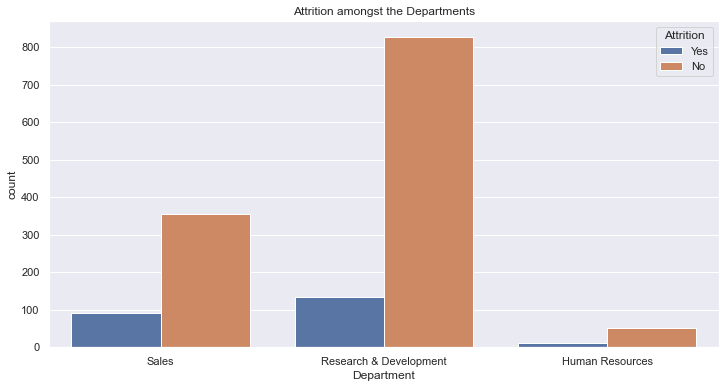

In [23]:
# Attrition is high in "Research and Development Department" compared to "Sales" department


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Department", hue="Attrition", data=df).set(title='Attrition amongst the Departments')

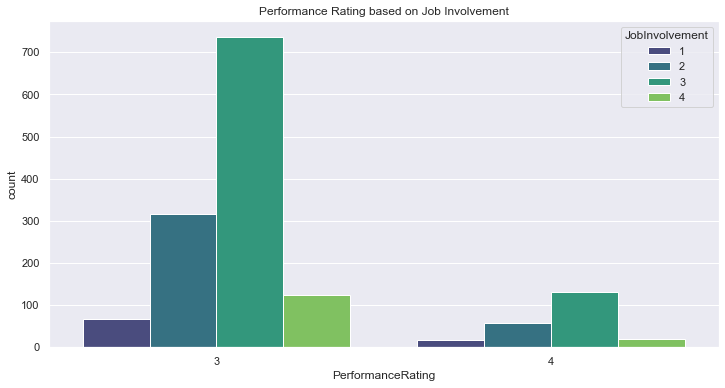

In [24]:
#  Relation between performance rating based on their involvement or performance.

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="PerformanceRating",hue="JobInvolvement", data=df, palette="viridis").set(title='Performance Rating based on Job Involvement')

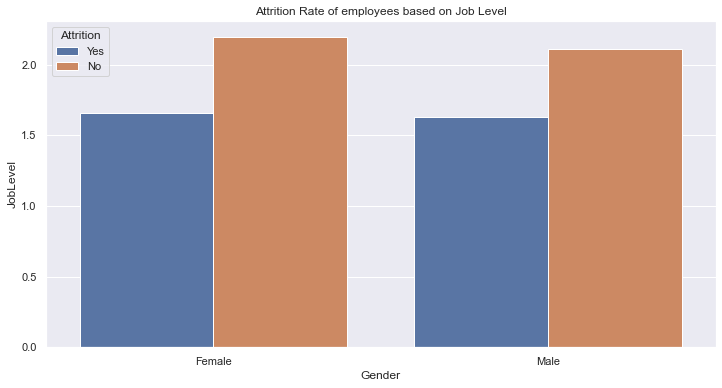

In [25]:
# Leaving job :

plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Gender", y="JobLevel", hue="Attrition", data=df, ci=None).set(title='Attrition Rate of employees based on Job Level')

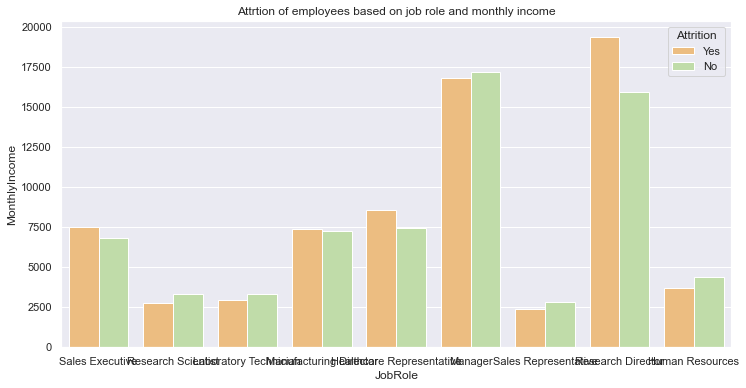

In [26]:
# Get relationship between salary and the position:


plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df, ci=None, palette="Spectral").set(title='Attrtion of employees based on job role and monthly income')

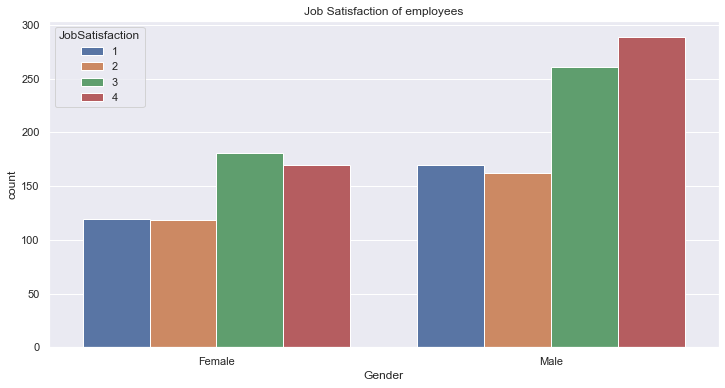

In [27]:
# Job Satisfication :

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Gender", hue="JobSatisfaction", data=df).set(title='Job Satisfaction of employees')

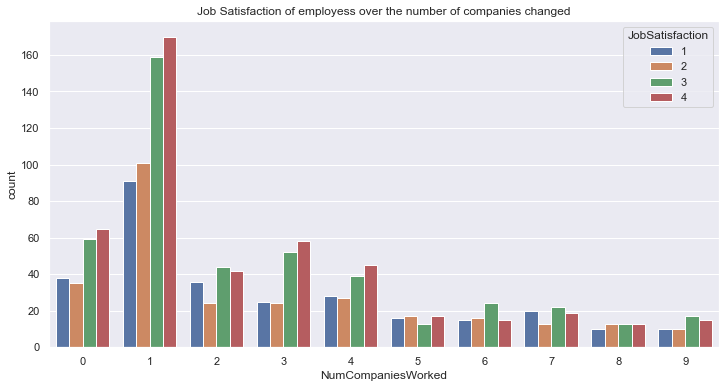

In [28]:
# Employee work experiance :

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="NumCompaniesWorked", hue="JobSatisfaction", data=df).set(title='Job Satisfaction of employess over the number of companies changed')

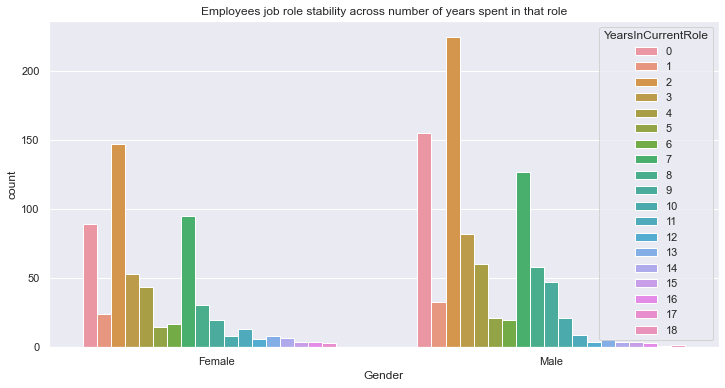

In [29]:
# Employee working on same post from last two years:

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Gender", hue="YearsInCurrentRole", data=df).set(title='Employees job role stability across number of years spent in that role')

[Text(0.5, 1.0, 'Percent of salary hike in comparison to number of companies worked')]

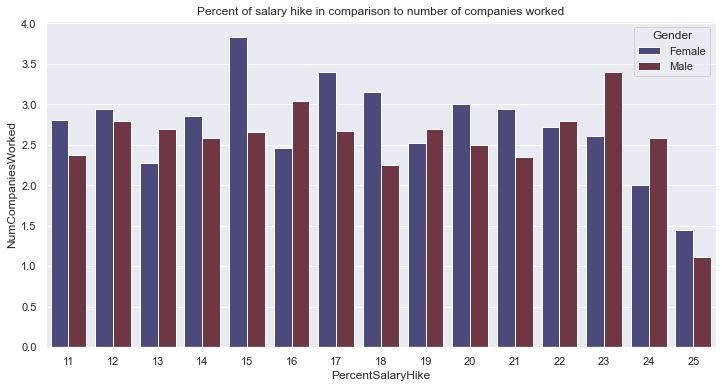

In [30]:
# % of hike given to employee:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="PercentSalaryHike", y="NumCompaniesWorked", hue="Gender", palette="icefire", ci=None).set(title='Percent of salary hike in comparison to number of companies worked')

We observe that "Female" employees have recieved a maximum hike percent of about 15% and "Male" employees ahve recieved a hike of about 23%.

[Text(0.5, 1.0, 'Percent of salary hike in comparison to overall work experience')]

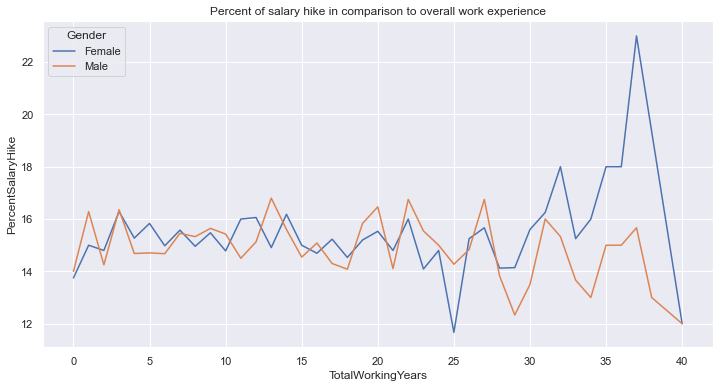

In [31]:
# % of hike given to employee on the basis of total experience:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="TotalWorkingYears", y="PercentSalaryHike", hue="Gender", ci=None).set(title='Percent of salary hike in comparison to overall work experience')

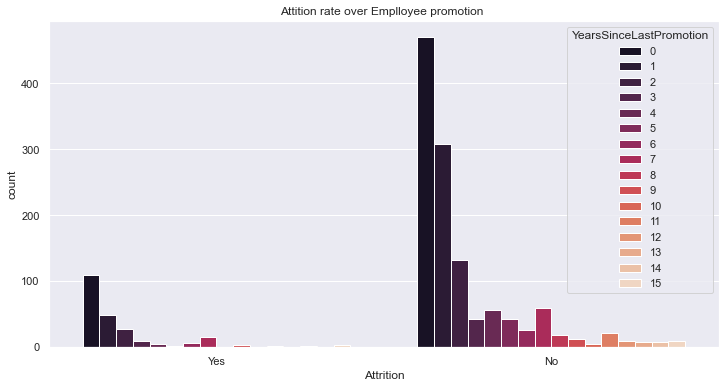

In [32]:
# Employee promotion :

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Attrition", hue="YearsSinceLastPromotion", data=df, palette="rocket").set(title='Attition rate over Emplloyee promotion ')

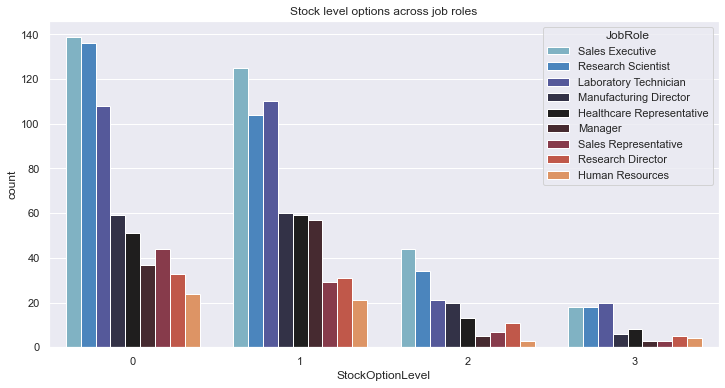

In [33]:
# Relationship between stock optins and job role:

plt.figure(figsize=(12, 6))
ax = sns.countplot(hue="JobRole", x="StockOptionLevel", data=df, palette="icefire").set(title='Stock level options across job roles')

### Encoding the dataset

In [34]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [35]:
df_new1 = lab_enc.fit_transform(df["Attrition"])
df_new2 = lab_enc.fit_transform(df["BusinessTravel"])
df_new3 = lab_enc.fit_transform(df["Department"])
df_new4 = lab_enc.fit_transform(df["EducationField"])
df_new5 = lab_enc.fit_transform(df["Gender"])
df_new6 = lab_enc.fit_transform(df["JobRole"])
df_new7 = lab_enc.fit_transform(df["MaritalStatus"])
df_new8 = lab_enc.fit_transform(df["Over18"])
df_new9 = lab_enc.fit_transform(df["OverTime"])

In [36]:
df["Attrition"] = df_new1
df["BusinessTravel"] = df_new2
df["Department"] = df_new3
df["EducationField"] = df_new4
df["Gender"] = df_new5
df["JobRole"] = df_new6
df["MaritalStatus"] = df_new7
df["Over18"] = df_new8
df["OverTime"] = df_new9

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


### Distribution of all the columns in the dataset

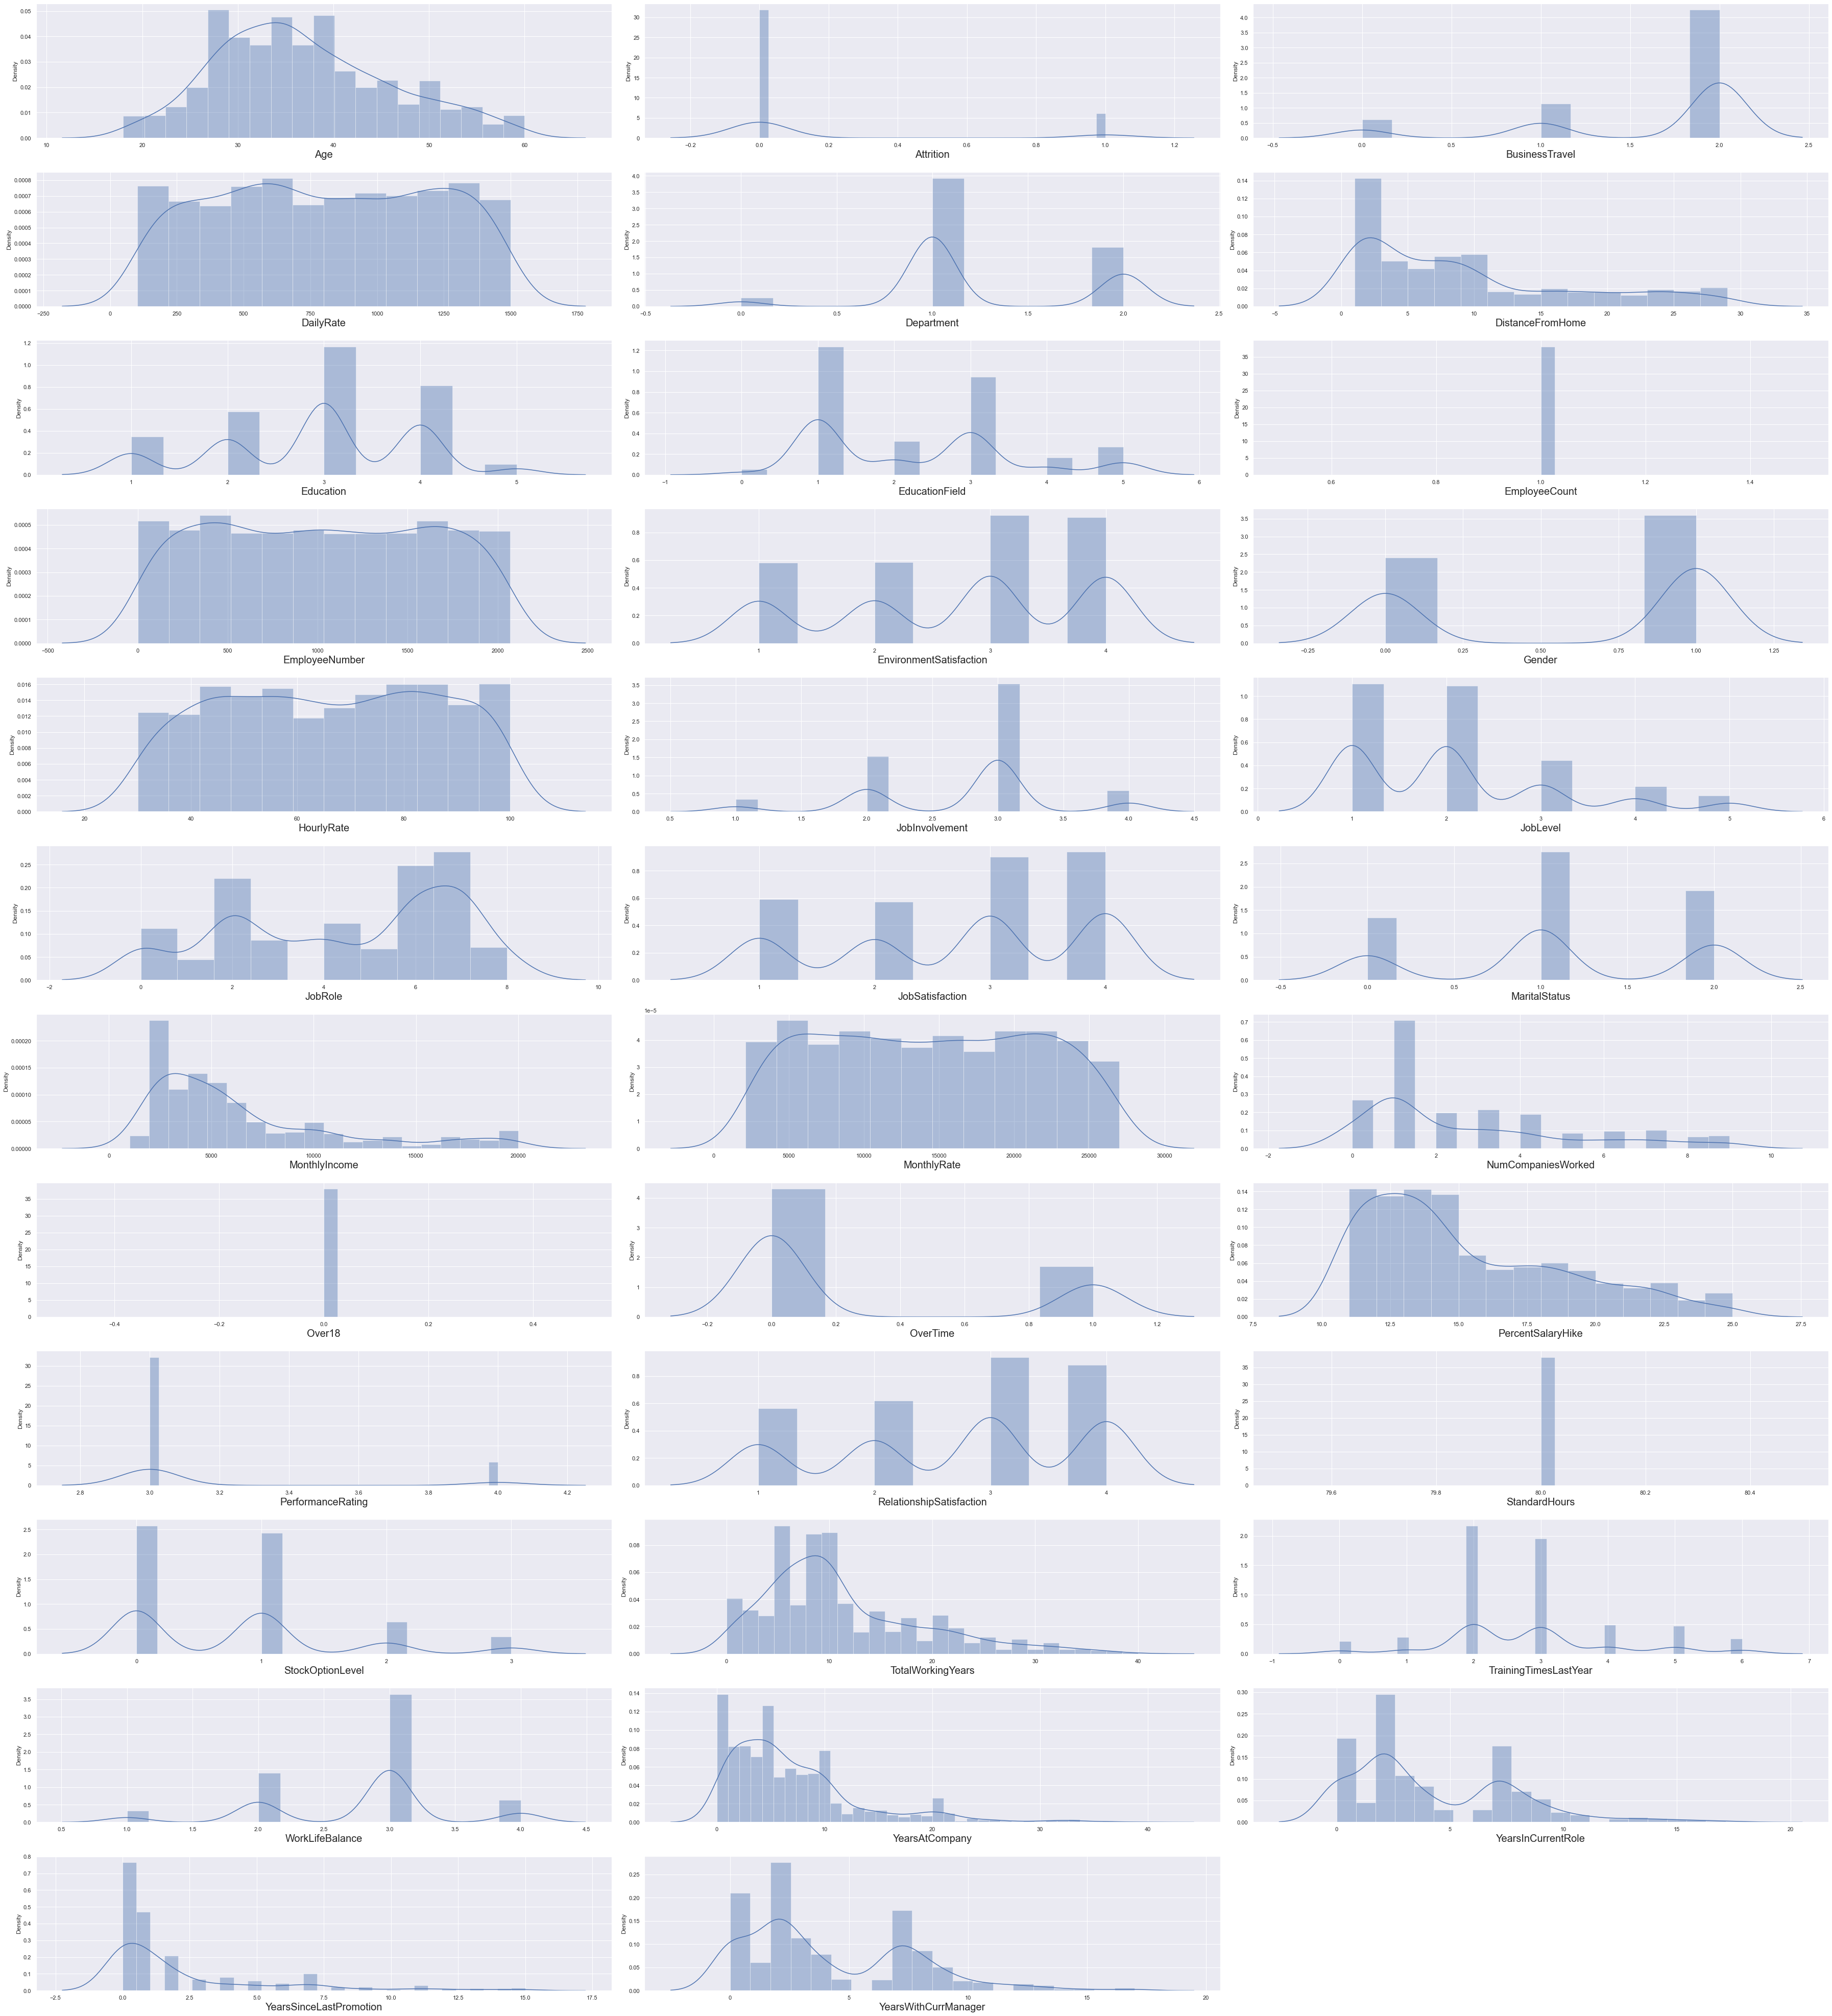

In [38]:
plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=35:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Apply Z-score for identifing and removing outliers

In [39]:
from scipy.stats import zscore

z_score = zscore(df[['DailyRate','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Correlation 

The "MonthlyIncome" seems to have a higher correlation

In [40]:
corr_matrix = df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

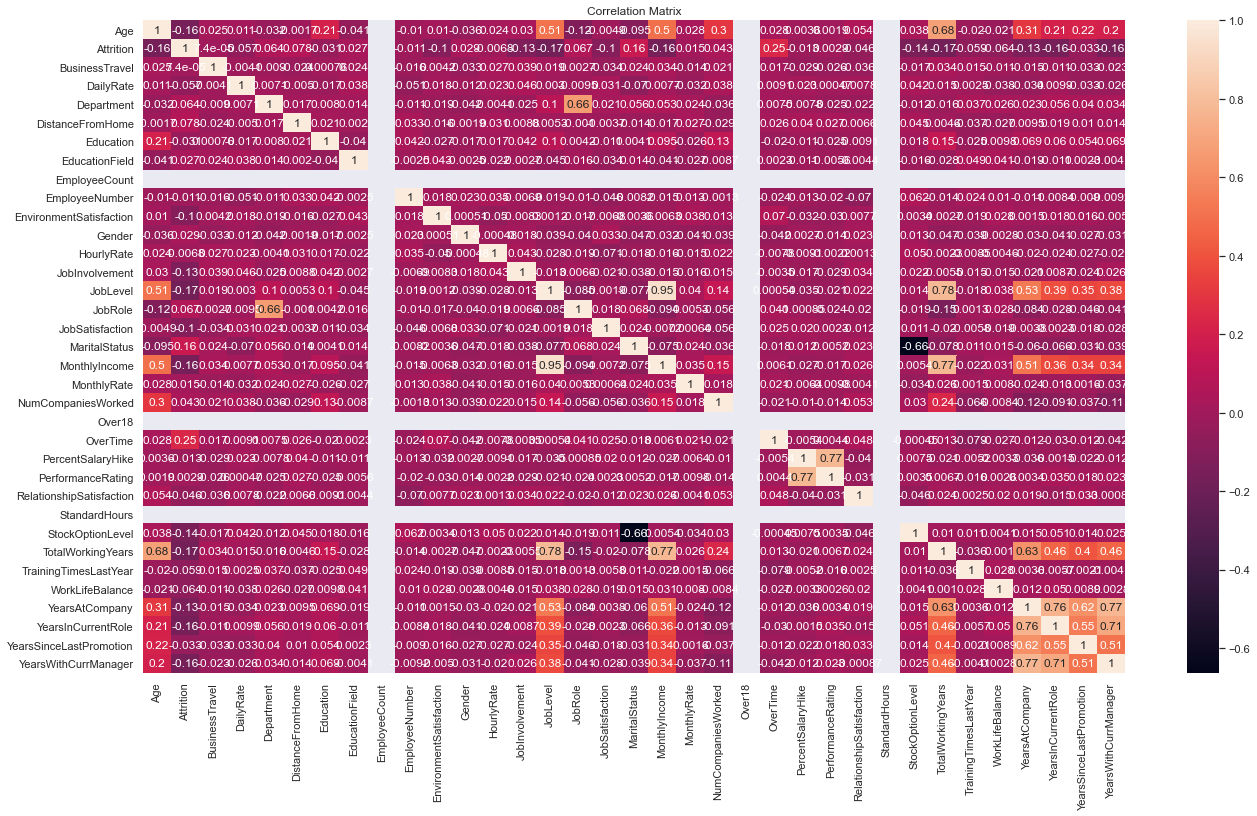

In [41]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Splitting dataset between x (features) and y (target column)

In [42]:
x = df.drop(columns = ["Attrition"], axis=1)
y = df["Attrition"]

Skewness of Data:

In [43]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

Find variance inflation factor in each scaled column:

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,NaN,EmployeeCount
8,1.022699,EmployeeNumber
9,1.018022,EnvironmentSatisfaction


#### Drop MonthlyIncome from dataset:

In [46]:
x.drop(['MonthlyIncome'], axis = 1, inplace=True)

In [47]:

x.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace=True)

In [48]:
# Now VIF :


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.049359,Age
1,1.014540,BusinessTravel
2,1.023801,DailyRate
3,1.904403,Department
4,1.012331,DistanceFromHome
5,1.063377,Education
6,1.016208,EducationField
7,1.016837,EnvironmentSatisfaction
8,1.019044,Gender
9,1.019924,HourlyRate


In [49]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Using SMOTE technique

In [53]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dell\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.05=py38_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda-navigator==2.1.1=py38_0
  - defaults/noarch::anaconda-project==0.9.1=pyhd3eb1b0_1
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::flake8==3.9.0=pyhd3eb1b0_0
  - defaults/noarch::importlib_metadata==3.10.0=hd3eb1b0_0
  - defaults/noarch::ipywidgets==7.6.3=pyhd3eb1b0_1
  - defaults/noarch::jsonschema==3.2.0=py_2
  - defaults/win-64::jupyter==1.0.0=py38_7
  - defaults/noarch::jupyterlab==3.0.14=pyhd3eb1b0_1
  - defaults/noarch::jupyterlab_server==2.4.0=pyhd3eb1b0_0
  - defaults/win-64::jupyter_server==1.4.1=py38haa95532_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - defaults/win-64::nbconvert==6.0.7=py38_0
  - defaults/noarch::nbformat==5.1.3=pyhd3eb

    certifi-2021.10.8          |   py38haa244fe_1         145 KB  conda-forge
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    gmpy2-2.1.2                |   py38hb63f22f_0         155 KB  conda-forge
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    importlib-metadata-3.10.0  |   py38haa244fe_0          27 KB  conda-forge
    libllvm9-9.0.1             |default_hcbf89dc_4          50 KB  conda-forge
    mpc-1.2.1                  |       h54e1faf_0         103 KB  conda-forge
    mpfr-4.1.0                 |       h8d14728_1         450 KB  conda-forge
    mpir-3.0.0                 |    he025d50_1002         3.0 MB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    pathtools-0.1.2            |             py_1           8 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    -----------------------------------------------------------


  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::flake8==3.9.0=pyhd3eb1b0_0
  - defaults/noarch::importlib_metadata==3.10.0=hd3eb1b0_0
  - defaults/noarch::ipywidgets==7.6.3=pyhd3eb1b0_1
  - defaults/noarch::jsonschema==3.2.0=py_2
  - defaults/win-64::jupyter==1.0.0=py38_7
  - defaults/noarch::jupyterlab==3.0.14=pyhd3eb1b0_1
  - defaults/noarch::jupyterlab_server==2.4.0=pyhd3eb1b0_0
  - defaults/win-64::jupyter_server==1.4.1=py38haa95532_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - defaults/win-64::nbconvert==6.0.7=py38_0
  - defaults/noarch::nbformat==5.1.3=pyhd3eb1b0_0
  - defaults/win-64::notebook==6.3.0=py38haa95532_0
  - defaults/noarch::pyls-black==0.4.6=hd3eb1b0_0
  - defaults/noarch::pyls-spyder==0.3.2=pyhd3eb1b0_0
  - defaults/noarch::python-language-server==0.36.2=pyhd3eb1b0_0
  - defaults/win-64::spyder==4.2.5=py38haa95532_0
  - defaults/win-64::widgetsnbextension==3.5.1=py38_0
  - def

conda-4.11.0         | 16.9 MB   | #4         |  15% 
conda-4.11.0         | 16.9 MB   | #8         |  18% 
conda-4.11.0         | 16.9 MB   | ##1        |  21% 
conda-4.11.0         | 16.9 MB   | ##4        |  25% 
conda-4.11.0         | 16.9 MB   | ##8        |  28% 
conda-4.11.0         | 16.9 MB   | ###1       |  32% 
conda-4.11.0         | 16.9 MB   | ###5       |  35% 
conda-4.11.0         | 16.9 MB   | ###8       |  39% 
conda-4.11.0         | 16.9 MB   | ####2      |  43% 
conda-4.11.0         | 16.9 MB   | ####5      |  46% 
conda-4.11.0         | 16.9 MB   | #####      |  51% 
conda-4.11.0         | 16.9 MB   | #####4     |  54% 
conda-4.11.0         | 16.9 MB   | #####7     |  57% 
conda-4.11.0         | 16.9 MB   | ######4    |  65% 
conda-4.11.0         | 16.9 MB   | ######8    |  69% 
conda-4.11.0         | 16.9 MB   | #######2   |  73% 
conda-4.11.0         | 16.9 MB   | #######6   |  76% 
conda-4.11.0         | 16.9 MB   | #######9   |  80% 
conda-4.11.0         | 16.9 

In [54]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [55]:
#Checking

y_over.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

#### split the dataset into train and test data set


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

### Create multi output classification models: 

### LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7162162162162162
[[269  72]
 [138 261]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       341
           1       0.78      0.65      0.71       399

    accuracy                           0.72       740
   macro avg       0.72      0.72      0.72       740
weighted avg       0.73      0.72      0.72       740



### DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8162162162162162
[[269  72]
 [ 64 335]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       341
           1       0.82      0.84      0.83       399

    accuracy                           0.82       740
   macro avg       0.82      0.81      0.81       740
weighted avg       0.82      0.82      0.82       740



### RandomForestClassifier

In [62]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))

TRAINING SCORE :  1.0
TESTING SCORE :  0.9
ACCURACY : 0.9
*****************************
[[319  22]
 [ 52 347]]
*****************************
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       341
           1       0.94      0.87      0.90       399

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



### GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8851351351351351
[[307  34]
 [ 51 348]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       341
           1       0.91      0.87      0.89       399

    accuracy                           0.89       740
   macro avg       0.88      0.89      0.88       740
weighted avg       0.89      0.89      0.89       740



### KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(confusion_matrix(y_test,y_pred))
print('*****************************')
print(classification_report(y_test,y_pred))

TRAINING SCORE :  0.8041714947856315
TESTING SCORE :  0.7608108108108108
ACCURACY : 0.7608108108108108
*****************************
[[222 119]
 [ 58 341]]
*****************************
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       341
           1       0.74      0.85      0.79       399

    accuracy                           0.76       740
   macro avg       0.77      0.75      0.75       740
weighted avg       0.77      0.76      0.76       740



### Cross validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scr = cross_val_score(log_reg, x, y, cv=5)
print("Cross Validation score of LogisticRegression model is:", scr.mean())

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

scr = cross_val_score(rfc, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

scr = cross_val_score(kn, x, y, cv=5)
print("Cross Validation score of KNN model is:", scr.mean())



Cross Validation score of LogisticRegression model is: 0.8401360544217686
Cross Validation score of DecisionTree model is: 0.7850340136054422
Cross Validation score of RandomForestClassifier model is: 0.8537414965986395
Cross Validation score of GradientBoostingClassifier model is: 0.8673469387755102
Cross Validation score of KNN model is: 0.8183673469387754


### ROC_AUC scores:

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [82]:
# Scores :

print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test, log_reg.predict(x_test)))

print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test, dt.predict(x_test)))

print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test, rfc.predict(x_test)))

print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test, gb_class.predict(x_test)))

print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.721495821665601
ROC_AUC_SCORE_RANDOM_FOREST : 0.8142276512395358
ROC_AUC_SCORE_DECISION_TREE : 0.9025790282157006
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.8862368531298921
ROC_AUC_SCORE_KNN : 0.7528314922202868


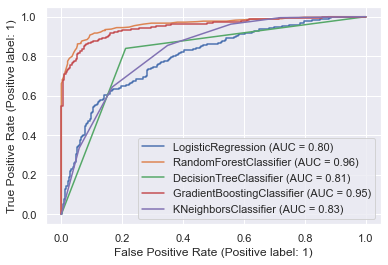

In [85]:
# Plotting Roc-Auc curve
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb_class,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Hyper Parameter Tuning

In [87]:
parameters = {"penalty":["l1", "l2", "elasticnet", "none"],
              "tol":[1e-4, 1e-2, 1e-3, 1e-1],
              "intercept_scaling":[1, 2, 3, 4, 5],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class":["auto", "ovr", "multinomial"],
              "max_iter":[50, 70, 100, 120, 130],
              "intercept_scaling":[1, 2, 3, 4, 5]
              }

Using GridSearchCV :

In [88]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [90]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'intercept_scaling': [1, 2, 3, 4, 5],
                         'max_iter': [50, 70, 100, 120, 130],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.01, 0.001, 0.1]})

In [91]:
GCV.best_params_

{'intercept_scaling': 1,
 'max_iter': 50,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg',
 'tol': 0.0001}

### Re-bulding the model :


In [95]:
mod_log_reg = LogisticRegression(intercept_scaling= 5, max_iter= 70, multi_class="ovr", penalty= "l1", solver= "liblinear", tol =0.001)

mod_log_reg.fit(x_train,y_train)
pred = mod_log_reg.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.5945945945946


### Save model (using joblib)

In [96]:
# Save model:

import joblib
joblib.dump(mod_log_reg,"HR_Analytics.pkl")

['HR_Analytics.pkl']

In [97]:
# load the saved model:

model = joblib.load("HR_Analytics.pkl")

In [98]:
prediction = model.predict(x_test)

In [99]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,0
2,1
3,1
4,0
...,...
735,0
736,1
737,0
738,1
